## Import the Required Libraries

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers,  models, datasets
from tensorflow.keras.layers import Conv2D, LeakyReLU

## Loading the Dataset

In [11]:
(train_data, train_labels), (test_data, test_labels) = datasets.mnist.load_data() #Used the Mnist Data Set

## Concatanating the Dataset

In [12]:
concatenated_data = np.concatenate((train_data, test_data), axis=0)
concatenated_labels = np.concatenate((train_labels, test_labels), axis=0)

#Normalization
concatenated_data = concatenated_data / 255.0

## Split the dataset

In [13]:
# Split the combined dataset into train, validation, and test sets
data_train, data_temp, labels_train, labels_temp = train_test_split(concatenated_data, concatenated_labels, test_size=0.4, random_state=42) #Split the training set
data_val, data_test, labels_val, labels_test = train_test_split(data_temp, labels_temp, test_size=0.5, random_state=42) #Split the validations and test set

## Reshape Data

In [14]:
#Convert each 2D image into 3D one
data_train = data_train.reshape(-1, 28, 28, 1)
data_val = data_val.reshape(-1, 28, 28, 1)
data_test = data_test.reshape(-1, 28, 28, 1)

## Building the model

In [15]:
model = tf.keras.models.Sequential()

# First convolutional layer with LeakyReLU activation, followed by Batch Normalization and MaxPooling
model.add(Conv2D(32, kernel_size=3, activation=LeakyReLU(alpha=0.001), input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Second convolutional layer with LeakyReLU activation, followed by Batch Normalization and MaxPooling
model.add(Conv2D(32, kernel_size=3, activation=LeakyReLU(alpha=0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Third convolutional layer with LeakyReLU activation, followed by Batch Normalization and MaxPooling
model.add(Conv2D(32, kernel_size=3, activation=LeakyReLU(alpha=0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

#Flattern Layer
model.add(tf.keras.layers.Flatten())

# Dense (fully connected) layer with 128 units and LeakyReLU activation
model.add(tf.keras.layers.Dense(128, activation=LeakyReLU(alpha=0.001)))

# Dropout layer to reduce overfitting during training
model.add(tf.keras.layers.Dropout(0.4))

# Output layer with 10 units (one for each class) and softmax activation for classification
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 3, 3, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,714 (96.54 KB)

 Trainable params: 24,522 (95.79 KB)

 Non-trainable params: 192 (768.00 B)

In [17]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Training The Model

In [18]:
history = model.fit(data_train, labels_train, epochs=20, validation_data=(data_val, labels_val))

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4991 - loss: 1.5173 - val_accuracy: 0.9291 - val_loss: 0.2551
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9155 - loss: 0.2932 - val_accuracy: 0.9559 - val_loss: 0.1470
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9450 - loss: 0.1824 - val_accuracy: 0.9647 - val_loss: 0.1129
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9597 - loss: 0.1379 - val_accuracy: 0.9684 - val_loss: 0.0993
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9668 - loss: 0.1111 - val_accuracy: 0.9730 - val_loss: 0.0868
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9716 - loss: 0.0930 - val_accuracy: 0.9762 - val_loss: 0.0797
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9755 - loss: 0.0830 - val_accuracy: 0.9769 - val_loss: 0.0749
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9801 -

## Plotting the Training & Validation Loss

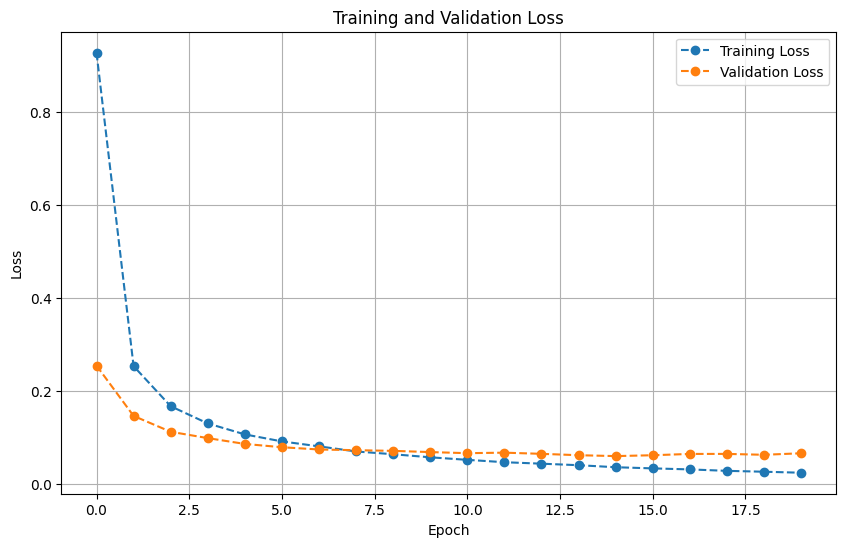

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o') #Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o') # Validation Loss
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Evaluating Model Performance with Classification Report and Confusion Matrix Visualization

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1419
           1       0.99      0.99      0.99      1607
           2       0.97      0.98      0.97      1403
           3       0.99      0.97      0.98      1437
           4       0.98      0.99      0.98      1326
           5       0.98      0.98      0.98      1249
           6       0.99      0.99      0.99      1351
           7       0.97      0.98      0.98      1488
           8       0.98      0.97      0.98      1319
           9       0.98      0.97      0.97      1401

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



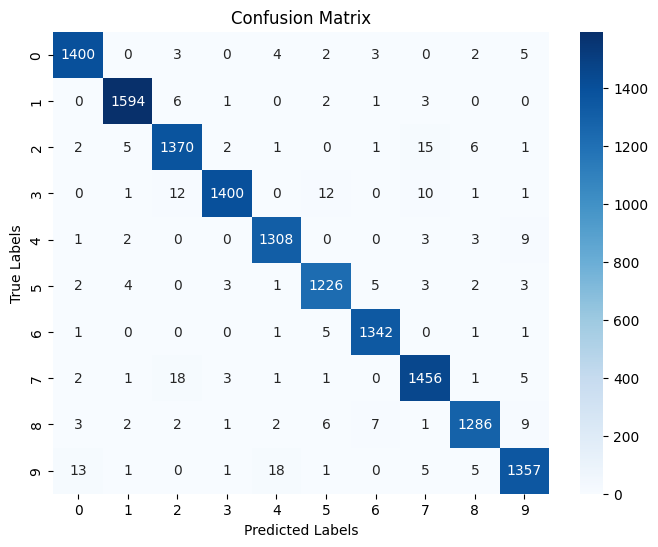

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions from the model
pred = model.predict(data_test)

pred_classes = np.argmax(pred, axis=1)

print(classification_report(labels_test, pred_classes, digits=2))
conf_matrix = confusion_matrix(labels_test, pred_classes)

class_labels = [str(i) for i in range(10)]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Training & Validation Losses for different learning rates

1. When Learning rate = 0.001

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9722 - loss: 0.0893 - val_accuracy: 0.9789 - val_loss: 0.0738
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9822 - loss: 0.0571 - val_accuracy: 0.9802 - val_loss: 0.0681
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9848 - loss: 0.0505 - val_accuracy: 0.9821 - val_loss: 0.0630
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9868 - loss: 0.0416 - val_accuracy: 0.9823 - val_loss: 0.0606
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9877 - loss: 0.0400 - val_accuracy: 0.9814 - val_loss: 0.0670
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9886 - loss: 0.0350 - val_accuracy: 0.9837 - val_loss: 0.0605
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9893 - loss: 0.0345 - val_accuracy: 0.9828 - val_loss: 0.0677
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9916 -

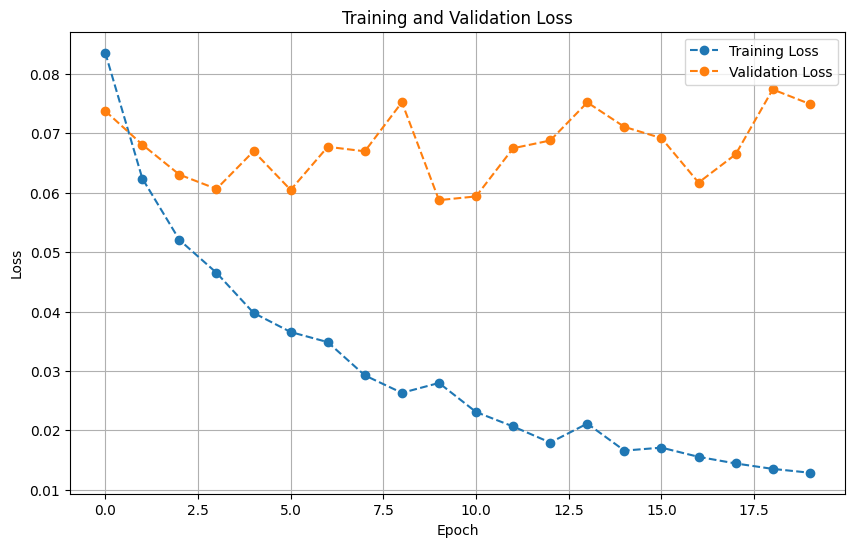

In [21]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(data_train, labels_train, epochs=20, validation_data=(data_val, labels_val))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o') #Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o') # Validation Loss
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

2. When Learning rate = 0.01

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9575 - loss: 0.1602 - val_accuracy: 0.9760 - val_loss: 0.0918
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9740 - loss: 0.0981 - val_accuracy: 0.9671 - val_loss: 0.1070
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9763 - loss: 0.0841 - val_accuracy: 0.9730 - val_loss: 0.1203
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9777 - loss: 0.0813 - val_accuracy: 0.9783 - val_loss: 0.0813
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9803 - loss: 0.0741 - val_accuracy: 0.9658 - val_loss: 0.1237
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9817 - loss: 0.0713 - val_accuracy: 0.9816 - val_loss: 0.0847
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9826 - loss: 0.0667 - val_accuracy: 0.9788 - val_loss: 0.0886
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9813 -

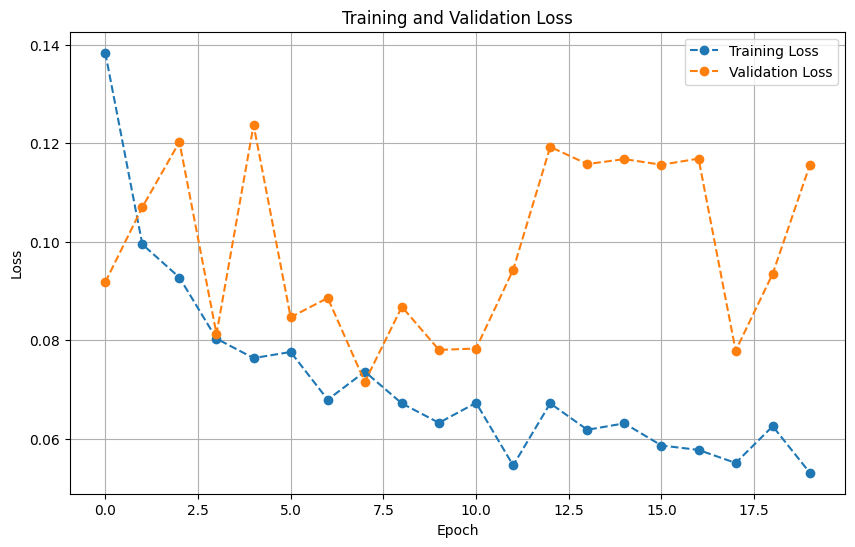

In [22]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(data_train, labels_train, epochs=20, validation_data=(data_val, labels_val))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o') #Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o') # Validation Loss
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

3. When Learning rate = 0.1

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.6771 - loss: 1.4241 - val_accuracy: 0.8659 - val_loss: 0.6129
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.6844 - loss: 1.0900 - val_accuracy: 0.8016 - val_loss: 3.3090
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.7350 - loss: 1.0106 - val_accuracy: 0.8728 - val_loss: 0.4187
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.6408 - loss: 1.5410 - val_accuracy: 0.7575 - val_loss: 0.6767
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7156 - loss: 1.0639 - val_accuracy: 0.8341 - val_loss: 0.8824
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.7053 - loss: 1.1766 - val_accuracy: 0.9047 - val_loss: 0.3499
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.6838 - loss: 1.3994 - val_accuracy: 0.9232 - val_loss: 0.2575
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7722 -

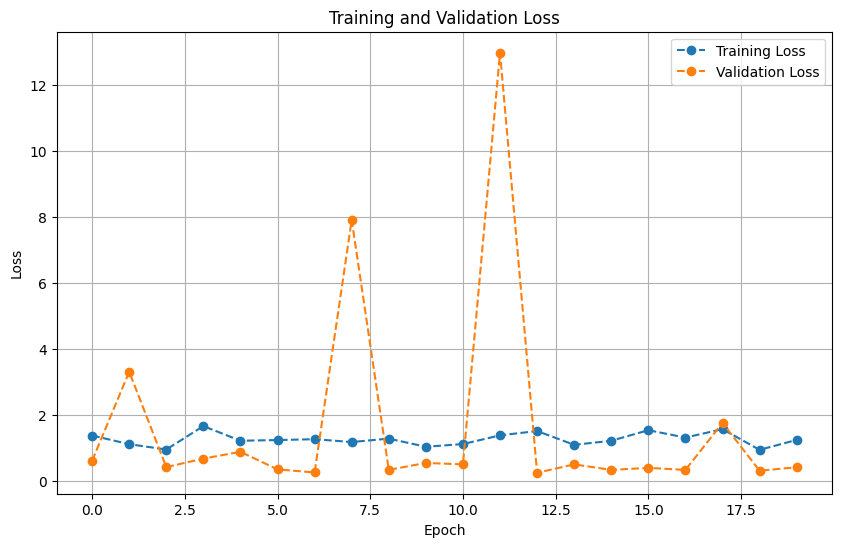

In [23]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(data_train, labels_train, epochs=20, validation_data=(data_val, labels_val))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o') #Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o') # Validation Loss
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()